In [1]:
#Social_Network_Ads.csv

**Importing the libraries**

In [2]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import matplotlib.pyplot as plt
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import accuracy_score

**Importing the dataset**

In [3]:
data=pd.read_csv("https://raw.githubusercontent.com/HariKumarN14/Training-datasets/main/Social_Network_Ads.csv")
data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [4]:
data.shape

(400, 5)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [6]:
data["Gender"].unique()

array(['Male', 'Female'], dtype=object)

In [7]:
from sklearn import preprocessing
label_encode=preprocessing.LabelEncoder()

data["Gender"]=label_encode.fit_transform(data["Gender"])

In [8]:
data["Gender"].unique()

array([1, 0])

**Splitting the dataset into the Training set and Test set**

In [9]:
x=data[["Gender","Age","EstimatedSalary"]].values
y=data["Purchased"].values

In [10]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split( x, y, test_size=0.25, random_state=0)
print ('Train set:', x_train.shape,  y_train.shape)
print ('Test set:', x_test.shape,  y_test.shape)

Train set: (300, 3) (300,)
Test set: (100, 3) (100,)


**Feature Scaling**

In [11]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(x_train)
x_train=scaler.transform(x_train)
x_test=scaler.transform(x_test)

**Fitting Decision Tree Classification to the Training set**

In [12]:
model = tree.DecisionTreeClassifier(random_state=0)
model.fit(x_train,y_train)
#y_train_pred = model.predict(x_train)
#y_test_pred = model.predict(x_test)

DecisionTreeClassifier(random_state=0)

**Predicting the Test set results**

In [13]:
y_test_pred = model.predict(x_test)
y_test_pred

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1])

**Making the Confusion Matrix**

In [14]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools

In [15]:
y_pred = model.predict(x_test)
confusion_matrix(y_test,y_pred)
pd.crosstab(y_test, y_pred, rownames = ['Actual'], colnames =['Predicted'], margins = True)

Predicted,0,1,All
Actual,,,
0,63,5,68
1,4,28,32
All,67,33,100


**Visualising the Training set results**

In [16]:
training_score = model.score(x_train,y_train)*100
print("Train data score is :",training_score)

Train data score is : 100.0


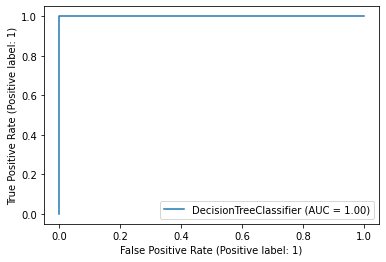

In [18]:
RocCurveDisplay.from_estimator(model,x_train,y_train)

**Visualising the Test set results**

In [19]:
test_score=accuracy_score(y_test,y_pred)*100
print("Test data score is :",test_score)

Test data score is : 91.0


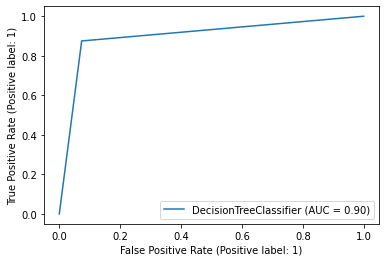

In [20]:
RocCurveDisplay.from_estimator(model,x_test,y_test)